<a href="https://colab.research.google.com/github/kapoorraaghav/TensorFlow/blob/main/Multiclass_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clothing classification

In [ ]:
#using tensorflolw fashion mnist dataset
'''Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.
Each example is a 28x28 grayscale image, associated with a label from 10 classes.
Different types of clothing material has been integer encoded from 0-1
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

"Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.\nEach example is a 28x28 grayscale image, associated with a label from 10 classes.\nDifferent types of clothing material has been integer encoded from 0-1\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n"

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
#dataset has already been sorted into training and test dataset and has been converted to greyscale images


# Load dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print(f'Training Sample:\n{train_data[0]}\n')
print(f'Training Label:\n{train_labels[0]}\n')

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

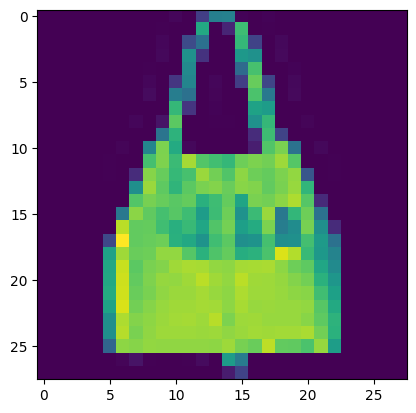

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[59000]);

In [ ]:
#creating a list to change the the onehot encoded numbers back to string
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 1.0, 'T-shirt/top')

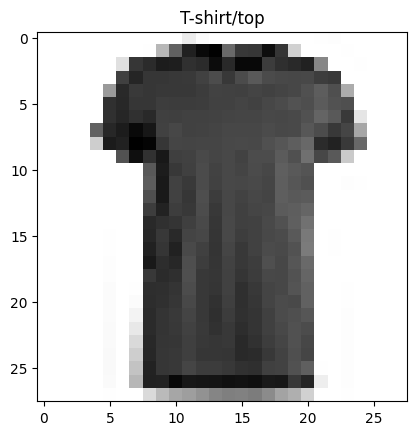

In [ ]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
#so input shape will be 28x28 and output shape should be 10
#if labels are onehot encoded then use categoricalcrossentropy
#if lables are integer encoded then use sparsecategoricalcrossentropy or onehot encode them before passing them into then neural network
#the first one has been converted to onehot encoding and the later one is in intergral form

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    tf.keras.layers.Dense(10,activation='softmax')])
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
non_norm_histroy_1 = model_1.fit(train_data,tf.one_hot(train_labels, depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels, depth=10)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0986 - loss: 3.4479 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0987 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0985 - loss: 2.3028 -

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #flattens the data and helps to reduce shape error (earlier i forgot to add this layer) the shape i would produce would be [none,784(28x28)]
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')])
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
non_norm_histroy_2 = model_2.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))#forgot to add dataset in validation data fucntion
#validation data is used to see how well the model performs how accurately it predicts validatio data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1198 - loss: 2.5797 - val_accuracy: 0.1703 - val_loss: 2.1475
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1834 - loss: 2.0457 - val_accuracy: 0.2501 - val_loss: 1.7540
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2612 - loss: 1.7576 - val_accuracy: 0.2748 - val_loss: 1.6987
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3198 - loss: 1.6329 - val_accuracy: 0.3465 - val_loss: 1.6226
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3580 - loss: 1.5399 - val_accuracy: 0.3816 - val_loss: 1.4742
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3849 - loss: 1.4732 - val_accuracy: 0.4117 - val_loss: 1.4201
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4354 - loss: 1.4012 - val_accuracy: 0.4448 - val_loss: 1.3273
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4527 - loss: 1.3086 - 

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
train_data.min(),train_data.max()

(np.uint8(0), np.uint8(255))

In [ ]:
#neural networks prefer to have data from 0 to 1 so we will have to normalize the data for that we will divide our data with 255 for better results

In [ ]:
test_data = test_data / 255
train_data = train_data / 255

In [ ]:
train_data.min(),train_data.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),

    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    tf.keras.layers.Dense(10,activation='softmax')])
model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
norm_histroy_1 = model_3.fit(train_data,tf.one_hot(train_labels, depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4424 - loss: 1.5401 - val_accuracy: 0.6407 - val_loss: 0.9073
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6890 - loss: 0.8195 - val_accuracy: 0.7369 - val_loss: 0.6805
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7474 - loss: 0.6550 - val_accuracy: 0.7775 - val_loss: 0.6235
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7922 - loss: 0.5916 - val_accuracy: 0.7979 - val_loss: 0.5843
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8096 - loss: 0.5539 - val_accuracy: 0.8011 - val_loss: 0.5695
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8149 - loss: 0.5380 - val_accuracy: 0.8062 - val_loss: 0.5595
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8198 - loss: 0.5279 - val_accuracy: 0.8083 - val_loss: 0.5537
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8215 - loss: 0.5205 -

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #flattens the data and helps to reduce shape error (earlier i forgot to add this layer) the shape i would produce would be [none,784(28x28)]
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')])
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
norm_histroy_2 = model_4.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))#forgot to add dataset in validation data fucntion
#validation data is used to see how well the model performs how accurately it predicts validatio data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4033 - loss: 1.5717 - val_accuracy: 0.7284 - val_loss: 0.7395
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7405 - loss: 0.7131 - val_accuracy: 0.7541 - val_loss: 0.6623
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7623 - loss: 0.6512 - val_accuracy: 0.7624 - val_loss: 0.6402
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7716 - loss: 0.6239 - val_accuracy: 0.7678 - val_loss: 0.6289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7776 - loss: 0.6065 - val_accuracy: 0.7718 - val_loss: 0.6203
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7821 - loss: 0.5940 - val_accuracy: 0.7758 - val_loss: 0.6109
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7860 - loss: 0.5837 - val_accuracy: 0.7780 - val_loss: 0.6030
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7901 - loss: 0.5751 -

In [ ]:
#ploting accuracy of all the four models

<Axes: title={'center': 'nomralized data integer encode'}>

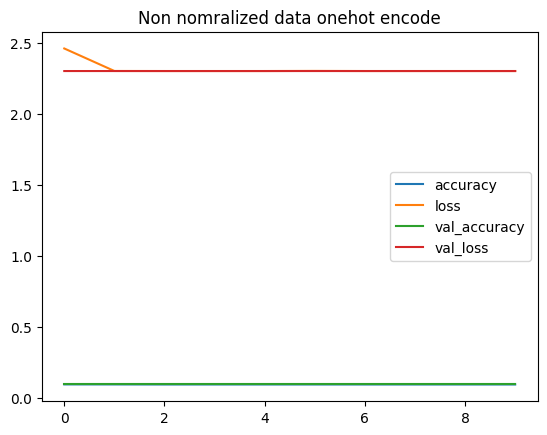

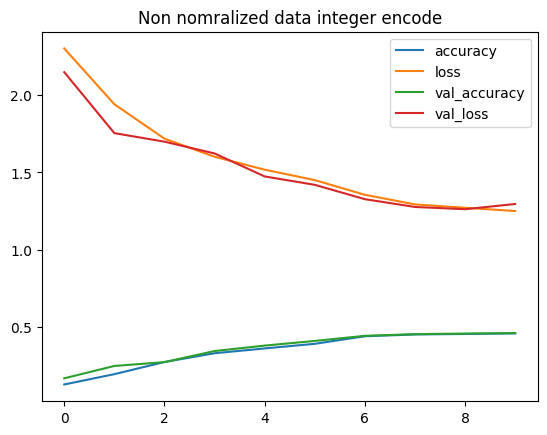

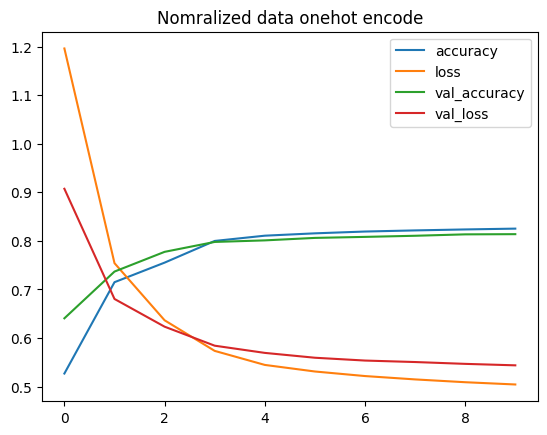

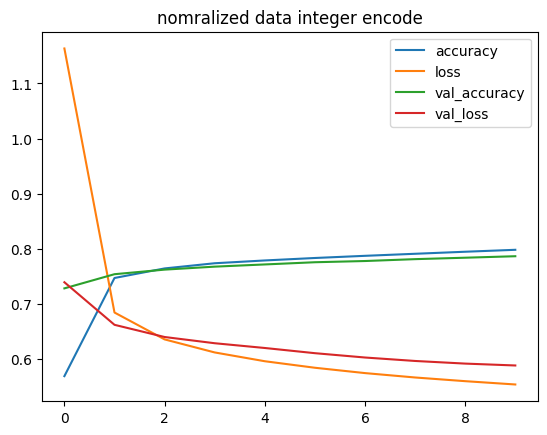

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_histroy_1.history).plot(title='Non nomralized data onehot encode')
pd.DataFrame(non_norm_histroy_2.history).plot(title='Non nomralized data integer encode')
pd.DataFrame(norm_histroy_1.history).plot(title='Nomralized data onehot encode')
pd.DataFrame(norm_histroy_2.history).plot(title='nomralized data integer encode')

In [ ]:
#finding the best laerning rate

In [ ]:
tf.random.set_seed(42)


model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


find_lr_history = model_5.fit(train_data, train_labels,epochs=40,validation_data=(test_data, test_labels),
                              callbacks=[lr_scheduler])





/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4344 - loss: 1.5494 - val_accuracy: 0.6885 - val_loss: 0.9214 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7034 - loss: 0.8354 - val_accuracy: 0.7436 - val_loss: 0.7100 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7512 - loss: 0.6854 - val_accuracy: 0.7563 - val_loss: 0.6758 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7636 - loss: 0.6516 - val_accuracy: 0.7613 - val_loss: 0.6592 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7701 - loss: 0.6332 - val_accuracy: 0.7670 - val_loss: 0.6464 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7747 - loss: 0.6202 - val_accuracy: 0.7715 - val_loss: 0.6344 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7784 - l

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

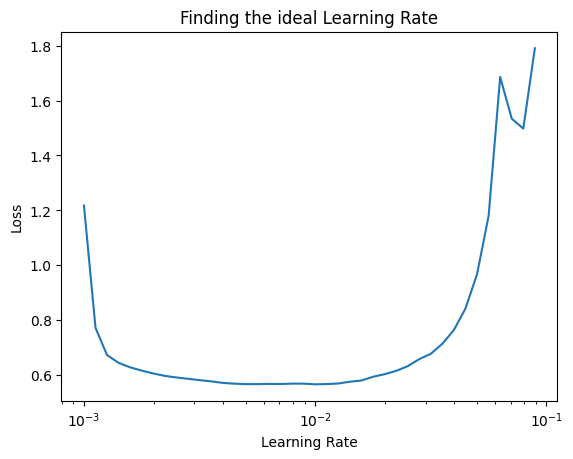

In [ ]:
#plotting it on a graph
import matplotlib.pyplot as plt
import numpy as np

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal Learning Rate')

In [ ]:
#lets make a new model and use the ideal lr
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
history_6 = model_6.fit(train_data, train_labels, epochs=20, validation_data=(test_data,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4416 - loss: 1.5320 - val_accuracy: 0.7098 - val_loss: 0.7853
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7336 - loss: 0.7497 - val_accuracy: 0.7452 - val_loss: 0.7056
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7571 - loss: 0.6841 - val_accuracy: 0.7565 - val_loss: 0.6742
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7637 - loss: 0.6549 - val_accuracy: 0.7655 - val_loss: 0.6556
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7821 - loss: 0.6226 - val_accuracy: 0.7988 - val_loss: 0.5966
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8080 - loss: 0.5657 - val_accuracy: 0.8058 - val_loss: 0.5735
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8136 - loss: 0.5431 - val_accuracy: 0.8080 - val_loss: 0.5634
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8179 - loss: 0.5312 -

In [ ]:
#evaluvating our model using confusion matrix
model_6.predict(test_)